# Sales Prediction Task 4

By:- Miss. Sweety Chandrakant Kodam

# Import required library files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Loading the dataset

In [3]:
sales_pred = pd.read_csv("advertising.csv")

# Reading the dataset

In [4]:
sales_pred

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Prepeocessing

In [6]:
sales_pred.shape #finding the shape of the dataset

(200, 4)

In [7]:
sales_pred.columns #to display the names of the columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
sales_pred.head() #to display the first five records of the dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
sales_pred.tail() #to display the last five records of the dataset

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [10]:
sales_pred.describe(include='all') #describe the dataset

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
sales_pred.isnull().sum() #check for the null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [12]:
sales_pred.duplicated() #checking for dupliactes

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [13]:
sales_pred.info() #checking for info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


# Visualizations

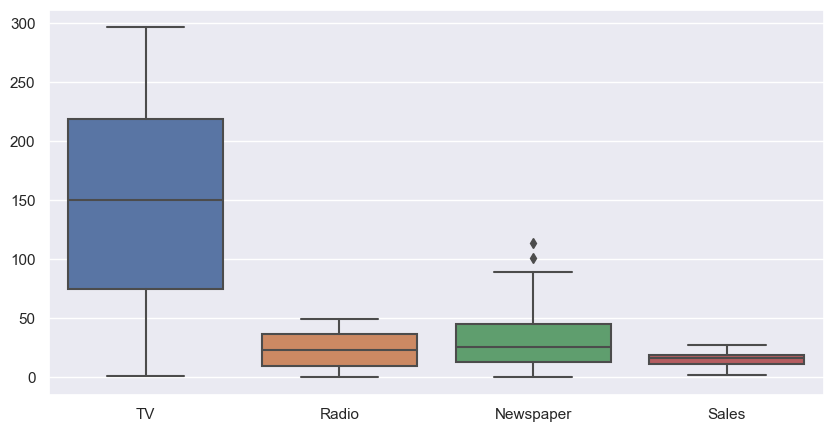

In [14]:
#plotting the boxplot
plt.figure(figsize=(10,5))
sns.boxplot(sales_pred)
plt.show()

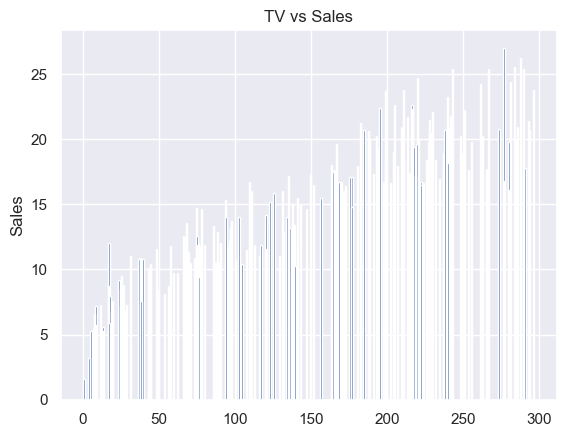

In [15]:
#plotting the bar plot
x=sales_pred["TV"]
y=sales_pred["Sales"]
plt.bar(x,y)
plt.title("TV vs Sales")
plt.ylabel("Sales")
plt.show()

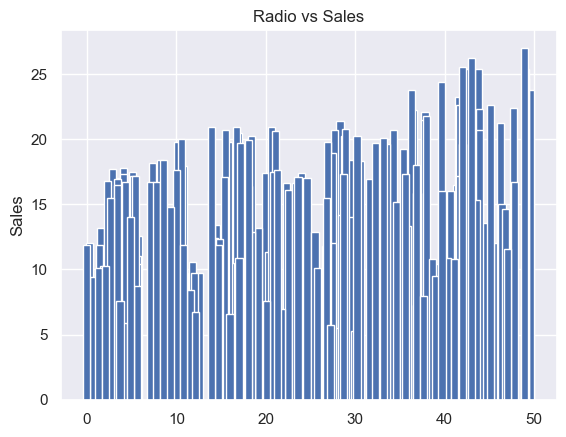

In [16]:
#plotting the bar plot
x=sales_pred["Radio"]
y=sales_pred["Sales"]
plt.bar(x,y)
plt.title("Radio vs Sales")
plt.ylabel("Sales")
plt.show()

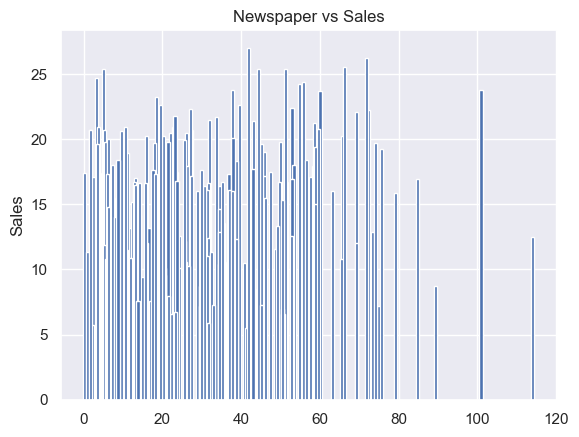

In [17]:
#plotting the bar plot
x=sales_pred["Newspaper"]
y=sales_pred["Sales"]
plt.bar(x,y)
plt.title("Newspaper vs Sales")
plt.ylabel("Sales")
plt.show()

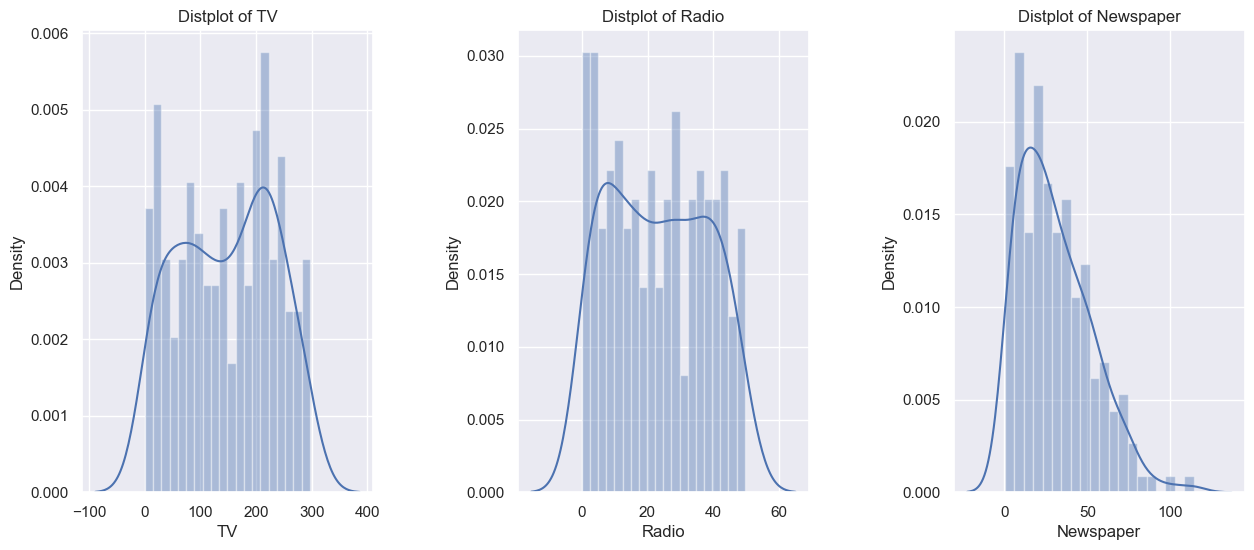

In [18]:
#distplot for TV, Radio, Newspaper
plt.figure(1 , figsize = (15 , 6))
n = 0
for x in ['TV' , 'Radio' , 'Newspaper']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(sales_pred[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

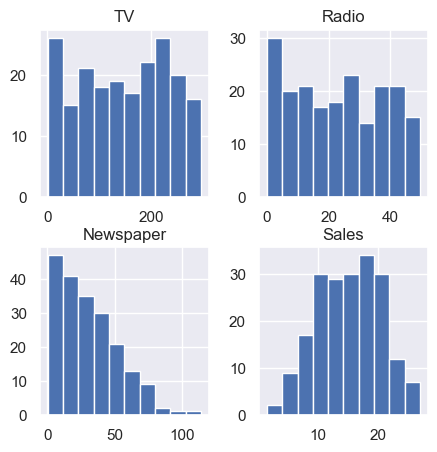

In [19]:
#plot the histogram
sales_pred.hist(figsize=(5,5))
plt.show()

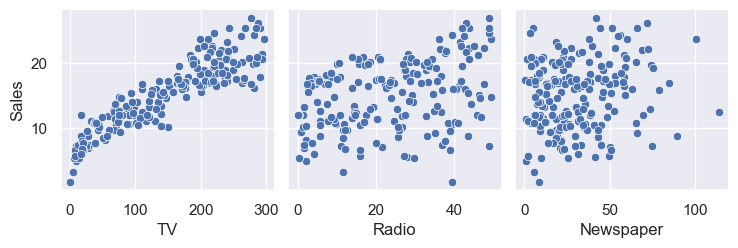

In [20]:
#plotting the pairplot
sns.pairplot(sales_pred, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')
plt.show()

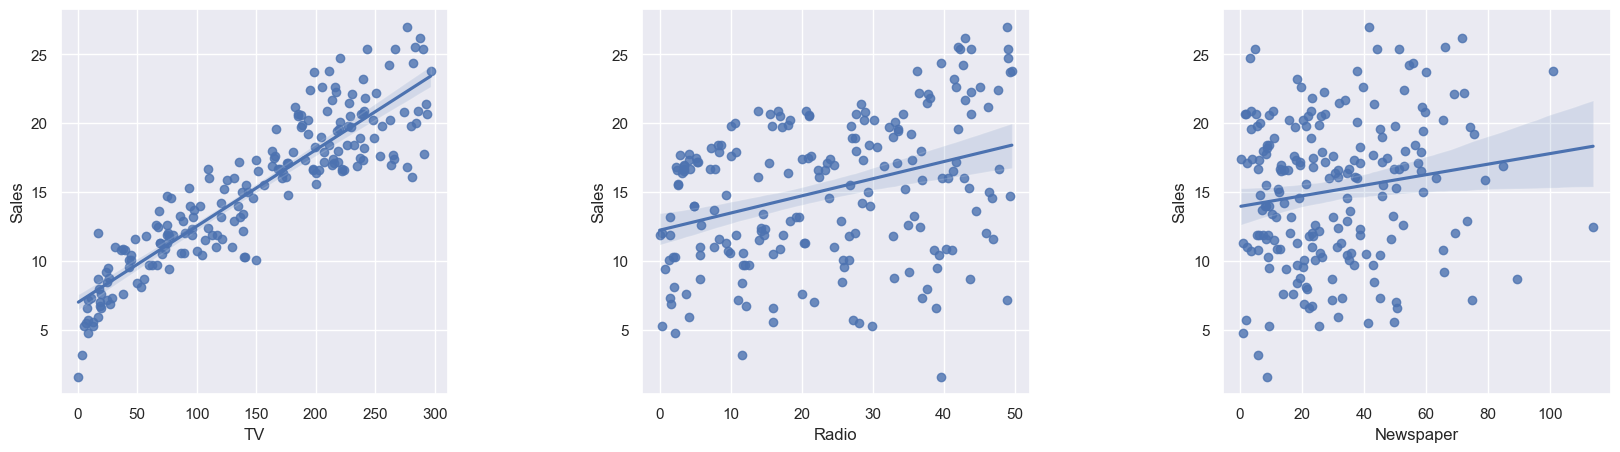

In [21]:
#regression plot for TV, Radio, Newspaper
plt.figure(1 , figsize = (20 , 20))
n = 0
for x in ['TV' , 'Radio' , 'Newspaper']:
    for y in ['Sales']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = sales_pred)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

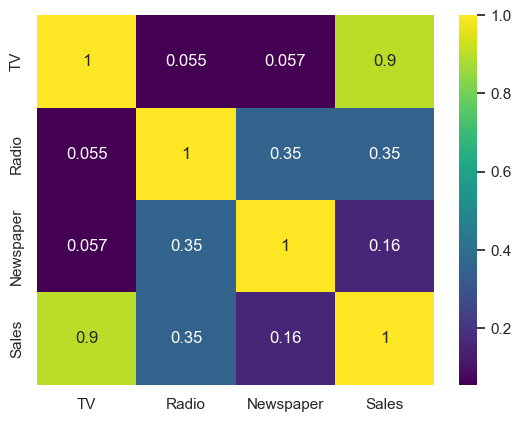

In [22]:
#heatmap to find the correlation
sns.heatmap(sales_pred.corr(), cmap="viridis", annot = True)
plt.show()

# Performing Train-Test splot

In [23]:
x = sales_pred.drop('Sales', axis=1)
y = sales_pred[['Sales']]

In [24]:
x.head() #finding the first five values

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [25]:
x.tail() #finding the last five values

,TV,Radio,Newspaper
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2
199,232.1,8.6,8.7


In [26]:
x.shape #to find the shape of the dataset

(200, 3)

In [27]:
x.dtypes #to check the datatypes

TV           float64
Radio        float64
Newspaper    float64
dtype: object

In [28]:
x.isnull().sum() #checking for null values

TV           0
Radio        0
Newspaper    0
dtype: int64

In [29]:
y.head() #finding the first five values

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


In [30]:
y.tail() #finding the last five values

,Sales
195,7.6
196,14.0
197,14.8
198,25.5
199,18.4


In [31]:
y.shape #shape of the dataset

(200, 1)

In [32]:
y.dtypes #finding the datatype

Sales    float64
dtype: object

In [33]:
y.isnull().sum() #checking for null values

Sales    0
dtype: int64

In [34]:
#performing the train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
x_train.shape #finding the shape of the x_train

(140, 3)

In [36]:
y_train.shape #finding the shape of the y_train

(140, 1)

# Model Building

# Linear Regression 

In [37]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [38]:
y_pred = model.predict(x_test) #predicting the model

In [39]:
y_pred #displaying the y_pred values

array([[17.15991908],
       [20.53369503],
       [23.68914396],
       [ 9.5191455 ],
       [21.60736836],
       [12.78101318],
       [21.08636345],
       [ 8.76054246],
       [17.11499951],
       [16.68789636],
       [ 8.97584663],
       [ 8.57645026],
       [18.33212325],
       [ 8.17863567],
       [12.64605571],
       [14.94486946],
       [ 8.34939536],
       [17.83858948],
       [11.12172174],
       [20.37740648],
       [20.9483297 ],
       [13.04035779],
       [11.01360656],
       [22.51142595],
       [ 9.40369784],
       [ 7.98591291],
       [20.86943368],
       [13.77882255],
       [10.83407064],
       [ 8.00419229],
       [15.88597618],
       [10.7027424 ],
       [20.9521718 ],
       [10.84679243],
       [21.50720813],
       [21.07347295],
       [12.22673775],
       [22.85273767],
       [12.57698182],
       [ 6.54597206],
       [11.93411853],
       [15.23490068],
       [10.07411153],
       [ 9.52159696],
       [17.11786382],
       [ 7

In [40]:
#finding the mean square error nad r2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [41]:
print(mse) #printing mse and r2 score
print(r2)

2.5416240362291496
0.9091484341849799


# Ridge regression

In [42]:
ridge_model = Ridge(alpha = 1.0)

In [43]:
ridge_model.fit(x_train, y_train)

Ridge()

# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [44]:
y_pred = ridge_model.predict(x_test) #predicting the model

In [45]:
y_pred

array([[17.15990587],
       [20.53361967],
       [23.68913346],
       [ 9.51910852],
       [21.60724817],
       [12.78098833],
       [21.08628187],
       [ 8.76058036],
       [17.11506161],
       [16.68790079],
       [ 8.97582227],
       [ 8.5765196 ],
       [18.33224202],
       [ 8.17859718],
       [12.64613493],
       [14.94493315],
       [ 8.34938912],
       [17.83857674],
       [11.12173711],
       [20.37737445],
       [20.94832957],
       [13.04037557],
       [11.0135297 ],
       [22.51140788],
       [ 9.40373034],
       [ 7.98598987],
       [20.86936084],
       [13.77884131],
       [10.83411309],
       [ 8.0041583 ],
       [15.88604816],
       [10.70274584],
       [20.9520955 ],
       [10.84676441],
       [21.50724801],
       [21.07341036],
       [12.22663239],
       [22.85273828],
       [12.57699639],
       [ 6.54605044],
       [11.93417395],
       [15.23493568],
       [10.07410503],
       [ 9.52163075],
       [17.1179317 ],
       [ 7

In [46]:
#finding the mean squared error
mse = mean_squared_error(y_test, y_pred)

In [47]:
print(mse)

2.541645103774752


In [48]:
#finding the r2 score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9091476811154942


# Lasso regression

In [49]:
lasso_model = Lasso(alpha=1.0)

In [50]:
#fitting the x_train and y_train to the model
lasso_model.fit(x_train, y_train)

Lasso()

# In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [51]:
y_pred = lasso_model.predict(x_test) #predicting the model

In [52]:
y_pred

array([17.09617741, 20.40269361, 23.64080423,  9.45774374, 21.53719134,
       12.71149451, 21.00400075,  8.83397706, 17.21375886, 16.68895381,
        9.02100532,  8.6574915 , 18.33149791,  8.19492453, 12.73862224,
       15.00016781,  8.32884057, 17.85823968, 11.13878824, 20.3812024 ,
       20.84688539, 12.88097424, 10.98200064, 22.39392361,  9.50872006,
        8.09339446, 20.7819073 , 13.84422059, 10.8932236 ,  8.04105409,
       15.97877038, 10.73900838, 20.80432032, 10.69707404, 21.52611312,
       21.0577744 , 12.17206781, 22.78101014, 12.65005937,  6.65824807,
       12.01106659, 15.32310865, 10.06473418,  9.59010646, 17.21706324,
        7.39273498, 10.5173619 , 15.25841038, 11.27786187, 11.79469255,
       13.92262404, 14.68782769, 10.67712758,  9.48190735,  9.15687328,
       12.58439658, 10.5828452 , 24.9038793 ,  8.03725859, 15.84952582])

In [53]:
#finding the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(mse)

2.52905678067919


In [54]:
#finding the r2 score
r2 = r2_score(y_test, y_pred)
print(r2)

0.9095976567404942
